# Практика

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [11]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
anglit_rv = sts.anglit()
sample = anglit_rv.rvs(100)
sample

array([-0.0791494 ,  0.42747967,  0.22632459,  0.25460393, -0.41709853,
       -0.17297138, -0.15045225,  0.41311525,  0.02033314,  0.31609586,
        0.61229564,  0.26297968, -0.70516259, -0.38940579, -0.08619591,
       -0.00990581,  0.12220846, -0.29647635,  0.0481673 ,  0.48483398,
        0.76191605, -0.58210028, -0.53351853, -0.17670996, -0.41389072,
       -0.02029519,  0.31439337,  0.37522384, -0.57519913, -0.53384573,
       -0.23073173, -0.31542068, -0.48733721,  0.27973522, -0.01080995,
       -0.46048162,  0.04139121,  0.09672021, -0.46734009,  0.41771845,
       -0.09370379, -0.17203779, -0.05271148,  0.63819869, -0.27725361,
       -0.23491612,  0.58294427,  0.53522086,  0.40174205, -0.43836454,
       -0.13901832,  0.02158617,  0.40039031,  0.18000667,  0.20668843,
        0.23930219,  0.14577818,  0.41412518, -0.0369416 ,  0.28803907,
        0.19632909, -0.41394776,  0.53103895, -0.35254305,  0.36854964,
        0.29929485,  0.1086803 , -0.34133146, -0.44261509,  0.39

In [12]:
sample.dtype

dtype('float64')

In [13]:
real_mean = anglit_rv.mean() # настоящее среднее случайной величины

In [14]:
real_var = anglit_rv.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

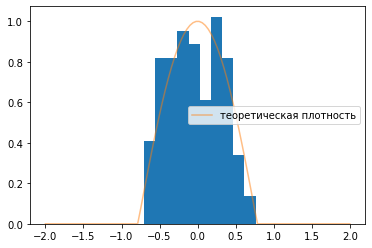

In [21]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-2,2,100)
pdf = anglit_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [16]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.029352240493753703
0.12081550658770357


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [20]:
# ваш код тут


Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing